In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 1. Construct Datasets for Training and Evaluation [4 points]

* (a) Load a real dataset of your choice that is designed for classification but was not
used in class; e.g., from sklearn.datasets, Kaggle, or your own data. (Code)
* (b) Create a 70/30 train/test split of the dataset. (Code)

In [10]:
## a. Loading a real dataset
from sklearn.datasets import load_wine

In [11]:
wine_dataset = load_wine()

In [12]:
print("Keys of the Wine Dataset:\n", wine_dataset.keys(),'\n')
print("Target names: ", wine_dataset["target"][:10],'\n')
print("Feature names: ", wine_dataset["feature_names"],'\n')
print("Shape of data: ", wine_dataset['data'].shape,'\n')
print("Dataset description: \n", wine_dataset['DESCR'],'\n')

Keys of the Wine Dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names']) 

Target names:  [0 0 0 0 0 0 0 0 0 0] 

Feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

Shape of data:  (178, 13) 

Dataset description: 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


In [13]:
# Spliting target variable and independent variables
X = wine_dataset["data"]
y = wine_dataset["target"] 

In [14]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [15]:
y=y.reshape(-1,1)
y.shape

(178, 1)

In [16]:
# train is now 70% of the entire data set
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print("Number of samples in training set is: ",len(Xb_train))
print("Number of samples in remaining set is: ",len(Xb_test))

Number of samples in training set is:  124
Number of samples in remaining set is:  54


## 2. Optimize Hyperparameter(s) for Classification Models [32 points]:
 
When evaluating each model in this problem, perform stratified 3-fold cross-validation on the training dataset and use the “accuracy” measure to assess performance.
 

**(a) K-Nearest Neighbors (K-NN): find the optimal hyperparameters for the distance
metric (i.e., test “Euclidean” and “Manhattan”) and number of nearest neighbors
(i.e., test at least 5 different values) when using k-Nearest Neighbors. Report the
optimal hyperparameters found and how many hyperparameter combinations you
tested in total. (Code and Write-up)**


In [ ]:
# K-Nearest Neighbors: Test number of neighbors from 1 to 10
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
Kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=0)

def get_optimal_k_value(p_value):
  training_accuracy = []
  test_accuracy = []
  best_score = 0
  k_values =  range(3,15)
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=p_value)
    knn.fit(Xb_train, yb_train)
    
    # Test model on the training data
    cur_train_accuracy = knn.score(Xb_train, yb_train)
    training_accuracy.append(cur_train_accuracy)

    # Test model on the test data
    cur_test_accuracy = knn.score(Xb_test, yb_test)
    test_accuracy.append(cur_test_accuracy)

    fold_accuracies = cross_val_score(knn, Xb_train, yb_train,cv=Kfold)
    score = fold_accuracies.mean()

    if score > best_score:
      best_param = {'n_neighbors': k}
      best_score = score 
    
  plt.plot(k_values, training_accuracy, label="Training accuracy")
  plt.plot(k_values, test_accuracy, label="Validation accuracy")
  plt.xlabel("Number of neighbors")
  plt.ylabel("Accuracy")
  plt.legend()


  print("Best score on score-validation: {:0.2f}".format(best_score))
  print("Best parameters: {}".format(best_param))

Best score on score-validation: 0.77
Best parameters: {'n_neighbors': 8}


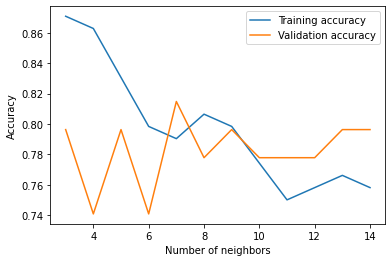

In [ ]:
get_optimal_k_value(1) # manhattan

Best score on score-validation: 0.74
Best parameters: {'n_neighbors': 10}


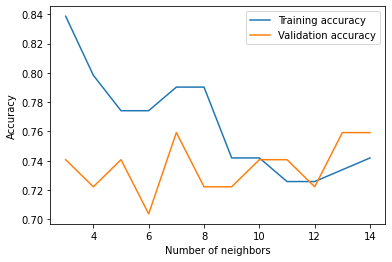

In [ ]:
get_optimal_k_value(2) # euclidean

In [ ]:
#patrick:
# According to the question 2, 
# you need to perform "stratified 3-fold cross-validation" on the training dataset
# nd use the "accuracy" measure to assess performance.

# So, you will need to import StratifiedKFold like:
# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

# And in your code, you will need to set the parameter, "cv", equal to kfold in your "cross_val_score"
# for example: fold_accuracies = cross_val_score(your_model, X_train, y_train, cv=kfold)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

# By the way, there is another parameter you should aware of in "cross_val_score", which is "scoring".
# Please refer to https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

**(b) Decision tree: find the optimal hyperparameters for the split criterion (i.e., test
“gini” and “entropy”) and tree depth (i.e., test at least 5 different values) when
training a decision tree. Report the optimal hyperparameters found and how
many hyperparameter combinations you tested in total. (Code and Write-up)**


In [ ]:
# Train a decision tree model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def get_decision_tree_hyperparamter(criterion):
  best_score = 0
  tree_depth_values = range(2,20)
  for d in tree_depth_values:
    decision_tree = DecisionTreeClassifier(criterion=criterion,max_depth=d,random_state=42)
    fold_accuracies = cross_val_score(decision_tree, Xb_train, yb_train, cv=Kfold)
    score = fold_accuracies.mean()
    if score > best_score:
      best_param = {'max_depth': d}
      best_score = score 

  print("Best score on score-validation: {:0.2f}".format(best_score))
  print("Best parameters: {}".format(best_param))


In [ ]:
get_decision_tree_hyperparamter('gini')

Best score on score-validation: 0.94
Best parameters: {'max_depth': 3}


In [ ]:
get_decision_tree_hyperparamter('entropy')

Best score on score-validation: 0.91
Best parameters: {'max_depth': 4}


The decision tree performance was best when criterion is 'gini and max depth is 3

**(c) Support Vector Machine (SVM): find the optimal hyperparameters for the polynomial degree, kernel bandwidth (i.e., gamma), and regularization parameter (i.e.,
C) when training a kernel SVM with a polynomial kernel. You must evaluate all
possible combinations of at least 4 degree values (for the polynomial degree), at
least 4 gamma values, and at least 4 C values. Report the optimal hyperparameters
found and how many hyperparameter combinations you tested in total. (Code
and Write-up)**

In [ ]:
# Tune hyperparameters for SVM using cross-validation
# One-vs-all/one-vs-rest classification

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly", degree = 4, C = 7,gamma = 0.001)
ovr_clf = OneVsRestClassifier(svm_clf)
ovr_clf.fit(Xb_train, yb_train)
predicted_classes = ovr_clf.predict(Xb_test)
print(predicted_classes[:5])

ovr_clf_svm_accuracy = ovr_clf.score(Xb_test, yb_test)
print(ovr_clf_svm_accuracy)


[0 0 2 1 1]
0.9444444444444444


In [ ]:
C = [6,7,8,9,10]
degree = [2,3,4,5,6]
gamma = [0.1,0.01,0.001,0.0001]

def get_best_params():
  best_score = 0
  for c in C:
    for d in degree:
      for g in gamma:
        svm_clf = SVC(kernel="poly", degree = d, C = c,gamma = g)
        ovr_clf = OneVsRestClassifier(svm_clf)
        fold_accuracies = cross_val_score(ovr_clf, Xb_train, yb_train, cv=Kfold)
        score = fold_accuracies.mean()
        if score > best_score:
          best_param = {'degree': d,'C':c,'gamma':g}
          best_score = score
  print("Best score on score-validation: {:0.2f}".format(best_score))
  print("Best parameters: {}".format(best_param))     

In [ ]:
get_best_params()

Best score on score-validation: 0.97
Best parameters: {'degree': 2, 'C': 6, 'gamma': 0.0001}


## 3. Comparative Analysis of Optimized Classification Models [32 points]: (Do not use GridSearchCV for this problem)


**(a) Retrain each of the three models (i.e., Decision tree, K-NN, and SVM) on all the
training data using the optimal hyperparameters found in part 2. Also train a
Gaussian Naive Bayes model on all the training data. (Code)**


Model no. 1 - KNN Classsifier

In [ ]:
## KNN Classifier
## Hyperparameter for KNN k=8 and p=1 (manhattan)

knn = KNeighborsClassifier(n_neighbors=8, p=1)
knn.fit(Xb_train, yb_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='uniform')

Model No.2 Decision Tree Classifier

In [ ]:
## Decsion Tree Classifier
## Best hyperparameter for Decision Tree Classifier is criterion is "gini" and max_depth = '3'

tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=3)
tree_gini.fit(Xb_train, yb_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Model No. 3 SVM Classifier

In [ ]:
svm_clf = SVC(kernel="poly", degree = 2, C = 6,gamma = 0.001)
ovr_clf = OneVsRestClassifier(svm_clf)
ovr_clf.fit(Xb_train, yb_train)

OneVsRestClassifier(estimator=SVC(C=6, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=2,
                                  gamma=0.001, kernel='poly', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

Model No. 4 Gaussian Naive Bayes Model

In [18]:
# Train and evaluate Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

gaussian_model = GaussianNB()
gaussian_model.fit(Xb_train, yb_train)


GaussianNB(priors=None, var_smoothing=1e-09)

**(b) Report the predictive performance on the test dataset for each of the four models from part (a) with respect to each of the following evaluation metrics: accuracy, precision, and recall. (Code and Write-up)**


In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

Model No. 1 KNN Classifier Evaluation

In [ ]:
knn_predictions = knn.predict(Xb_test) ## Predictions for KNN

print('The accuracy score for KNN classifier is:',accuracy_score(yb_test,knn_predictions),'\n')
print('The precision score for KNN classifier is: ',precision_score(yb_test,knn_predictions,average='weighted'),'\n')
print('The recall score for KNN classifier is: ', recall_score(yb_test,knn_predictions,average='weighted'),'\n')

print('The classification report is: ')

print('\n',metrics.classification_report(yb_test, knn_predictions))

The accuracy score for KNN classifier is: 0.7777777777777778 

The precision score for KNN classifier is:  0.7792397660818713 

The recall score for KNN classifier is:  0.7777777777777778 

The classification report is: 

               precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.79      0.71      0.75        21
           2       0.60      0.64      0.62        14

    accuracy                           0.78        54
   macro avg       0.76      0.77      0.76        54
weighted avg       0.78      0.78      0.78        54



Model No. 2 Decision Tree Classifier Evaluation

In [ ]:
tree_predictions = tree_gini.predict(Xb_test)

print('The accuracy score for Decision Tree classifier is:',accuracy_score(yb_test,tree_predictions),'\n')
print('The precision score for Decision Tree classifier is: ',precision_score(yb_test,tree_predictions,average='weighted'),'\n')
print('The recall score for Decision Tree classifier is: ', recall_score(yb_test,tree_predictions,average='weighted'),'\n')

print('The classification report is: ')

print('\n',metrics.classification_report(yb_test, tree_predictions))

The accuracy score for Decision Tree classifier is: 0.9444444444444444 

The precision score for Decision Tree classifier is:  0.9513888888888888 

The recall score for Decision Tree classifier is:  0.9444444444444444 

The classification report is: 

               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.88      1.00      0.93        21
           2       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



Model No. 3 SVM Classifier Evaluation

In [ ]:
svm_predictions = ovr_clf.predict(Xb_test)

print('The accuracy score for SVM classifier is:',accuracy_score(yb_test,svm_predictions),'\n')
print('The precision score for SVM classifier is: ',precision_score(yb_test,svm_predictions,average='weighted'),'\n')
print('The recall score for SVM classifier is: ', recall_score(yb_test,svm_predictions,average='weighted'),'\n')

print('The classification report is: ')
print('\n',metrics.classification_report(yb_test, svm_predictions))

The accuracy score for SVM classifier is: 0.9814814814814815 

The precision score for SVM classifier is:  0.9824074074074074 

The recall score for SVM classifier is:  0.9814814814814815 

The classification report is: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Model No. 4 Gaussian Naive Bayes Model

In [21]:
gnb_predictions = gaussian_model.predict(Xb_test)

print('The accuracy score for Naive Bayes classifier is:',accuracy_score(yb_test,gnb_predictions),'\n')
print('The precision score for Naive Bayes classifier is: ',precision_score(yb_test,gnb_predictions,average='weighted'),'\n')
print('The recall score for Naive Bayes classifier is: ', recall_score(yb_test,gnb_predictions,average='weighted'),'\n')

print('The classification report is: ')
print('\n',metrics.classification_report(yb_test, gnb_predictions))

The accuracy score for Naive Bayes classifier is: 1.0 

The precision score for Naive Bayes classifier is:  1.0 

The recall score for Naive Bayes classifier is:  1.0 

The classification report is: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



**(c) Visualize the predictive performance of the each of the four models from part (a) by showing the resulting confusion matrix for each model. (Code and Write-up)**


Model No. 1 KNN Classifier Evaluation

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
print(metrics.confusion_matrix(yb_test,knn_predictions))

[[18  0  1]
 [ 1 15  5]
 [ 1  4  9]]


In [ ]:
class_names = wine_dataset.target_names

	 Confusion Matrix for KNN Classifier 



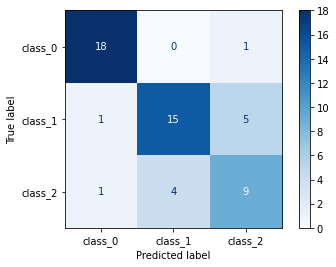

In [ ]:
print("\t Confusion Matrix for KNN Classifier \n")
disp = plot_confusion_matrix(knn, Xb_test, yb_test,display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

Model No.2 Decision Tree Classifier

In [ ]:
print(metrics.confusion_matrix(yb_test,tree_predictions))

[[17  2  0]
 [ 0 21  0]
 [ 0  1 13]]


	 Confusion Matrix for Decision Tree Classifier 



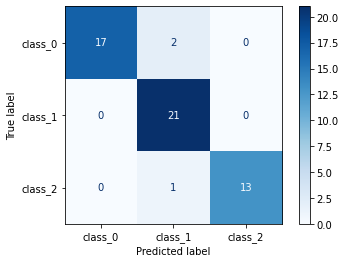

In [ ]:
print("\t Confusion Matrix for Decision Tree Classifier \n")
disp = plot_confusion_matrix(tree_gini, Xb_test, yb_test,display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

Model No. 3 SVM Classifier 

In [ ]:
print(metrics.confusion_matrix(yb_test,svm_predictions))

[[19  0  0]
 [ 1 20  0]
 [ 0  0 14]]


	 Confusion Matrix for SVM Classifier 



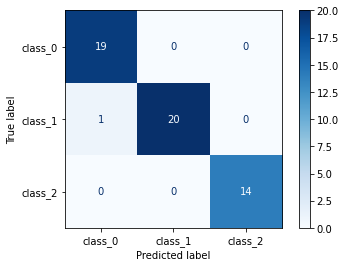

In [ ]:
print("\t Confusion Matrix for SVM Classifier \n")
disp = plot_confusion_matrix(ovr_clf, Xb_test, yb_test,display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

Model No. 4 Gaussian Naive Bayes Model

In [ ]:
print(metrics.confusion_matrix(yb_test,gnb_predictions))

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


	 Confusion Matrix for Gaussian Naive Bayes Classifier 



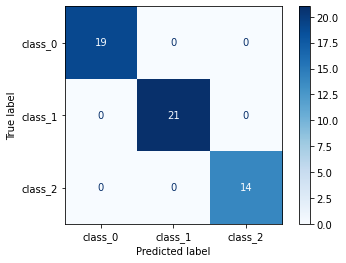

In [ ]:
print("\t Confusion Matrix for Gaussian Naive Bayes Classifier \n")
disp = plot_confusion_matrix(gaussian_model, Xb_test, yb_test,display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

## 4. Ensemble Learning [32 points]: Analyze the effects of using different types of ensembles for the classification task.


**a) Evaluate each of the following classifiers using 3-fold cross validation(Code)**
*  Majority vote classifier that uses the four classifiers from part 3 of this assignment
* Bagging method
* Boosting method

In [ ]:
# Ensemble learning

# 1. Majority vote ensemble learner

from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('gnb', gaussian_model), ('dt', tree_gini),('svm',ovr_clf),('knn',knn)], voting='hard')
voting_classifier.fit(Xb_train, yb_train)

VotingClassifier(estimators=[('gnb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                       

In [ ]:
fold_accuracies = cross_val_score(voting_classifier, Xb_train, yb_train,cv=Kfold)
voting_score = fold_accuracies.mean()

In [ ]:
print(voting_score)

0.9355400696864112


**Bagging Method**

In [ ]:
#2. Bagging ensemble

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(ovr_clf)
bagging.fit(Xb_train, yb_train)

BaggingClassifier(base_estimator=OneVsRestClassifier(estimator=SVC(C=7,
                                                                   break_ties=False,
                                                                   cache_size=200,
                                                                   class_weight=None,
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=4,
                                                                   gamma=0.001,
                                                                   kernel='poly',
                                                                   max_iter=-1,
                                                                   probability=False,
                                                                   random_state=None,
       

In [ ]:
fold_accuracies = cross_val_score(bagging, Xb_train, yb_train,cv=Kfold)
bagging_score = fold_accuracies.mean()

In [ ]:
print(bagging_score)

0.9353464963221061


**Boosting Method**

In [ ]:
#3. Adaboost algorithm
from sklearn.ensemble import AdaBoostClassifier

adabooster = AdaBoostClassifier(n_estimators=50)
adabooster.fit(Xb_train, yb_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
fold_accuracies = cross_val_score(adabooster, Xb_train, yb_train,cv=Kfold)
boosting_score = fold_accuracies.mean()

In [ ]:
print(boosting_score)

0.9111498257839722


b) Report in a table the mean precision, recall, and accuracy of each classifier you evaluated in the previous step for each dataset. (Write-up)

In [ ]:
voting_predictions = voting_classifier.predict(Xb_test)


print('The accuracy score for voting classifier is:',accuracy_score(yb_test,voting_predictions),'\n')
print('The precision score for voting classifier is: ',precision_score(yb_test,voting_predictions,average='weighted'),'\n')
print('The recall score for voting classifier is: ', recall_score(yb_test,voting_predictions,average='weighted'),'\n')

print('The classification report is: ')
print('\n',metrics.classification_report(yb_test, voting_predictions))

The accuracy score for voting classifier is: 0.9629629629629629 

The precision score for voting classifier is:  0.9638888888888888 

The recall score for voting classifier is:  0.9629629629629629 

The classification report is: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.95      0.95      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [ ]:
bagging_predictions = bagging.predict(Xb_test)


print('The accuracy score for bagging classifier is:',accuracy_score(yb_test,bagging_predictions),'\n')
print('The precision score for bagging classifier is: ',precision_score(yb_test,bagging_predictions,average='weighted'),'\n')
print('The recall score for bagging classifier is: ', recall_score(yb_test,bagging_predictions,average='weighted'),'\n')

print('The classification report is: ')
print('\n',metrics.classification_report(yb_test, bagging_predictions))

The accuracy score for bagging classifier is: 0.9629629629629629 

The precision score for bagging classifier is:  0.9629629629629629 

The recall score for bagging classifier is:  0.9629629629629629 

The classification report is: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



In [ ]:
boosting_predictions = adabooster.predict(Xb_test)

print('The accuracy score for boosting classifier is:',accuracy_score(yb_test,boosting_predictions),'\n')
print('The precision score for boosting classifier is: ',precision_score(yb_test,boosting_predictions,average='weighted'),'\n')
print('The recall score for boosting classifier is: ', recall_score(yb_test,boosting_predictions,average='weighted'),'\n')

print('The classification report is: ')
print('\n',metrics.classification_report(yb_test, boosting_predictions))


The accuracy score for boosting classifier is: 0.9259259259259259 

The precision score for boosting classifier is:  0.931682769726248 

The recall score for boosting classifier is:  0.9259259259259259 

The classification report is: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.87      0.95      0.91        21
           2       1.00      0.79      0.88        14

    accuracy                           0.93        54
   macro avg       0.94      0.91      0.92        54
weighted avg       0.93      0.93      0.92        54



In [ ]:
## End